In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as hr
import dionysus as d
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from src.tda import ClutchMapper, visualize_complex
from src.data_pipeline import query_avg
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

plt.style.use('ggplot')
init_notebook_mode(connected=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


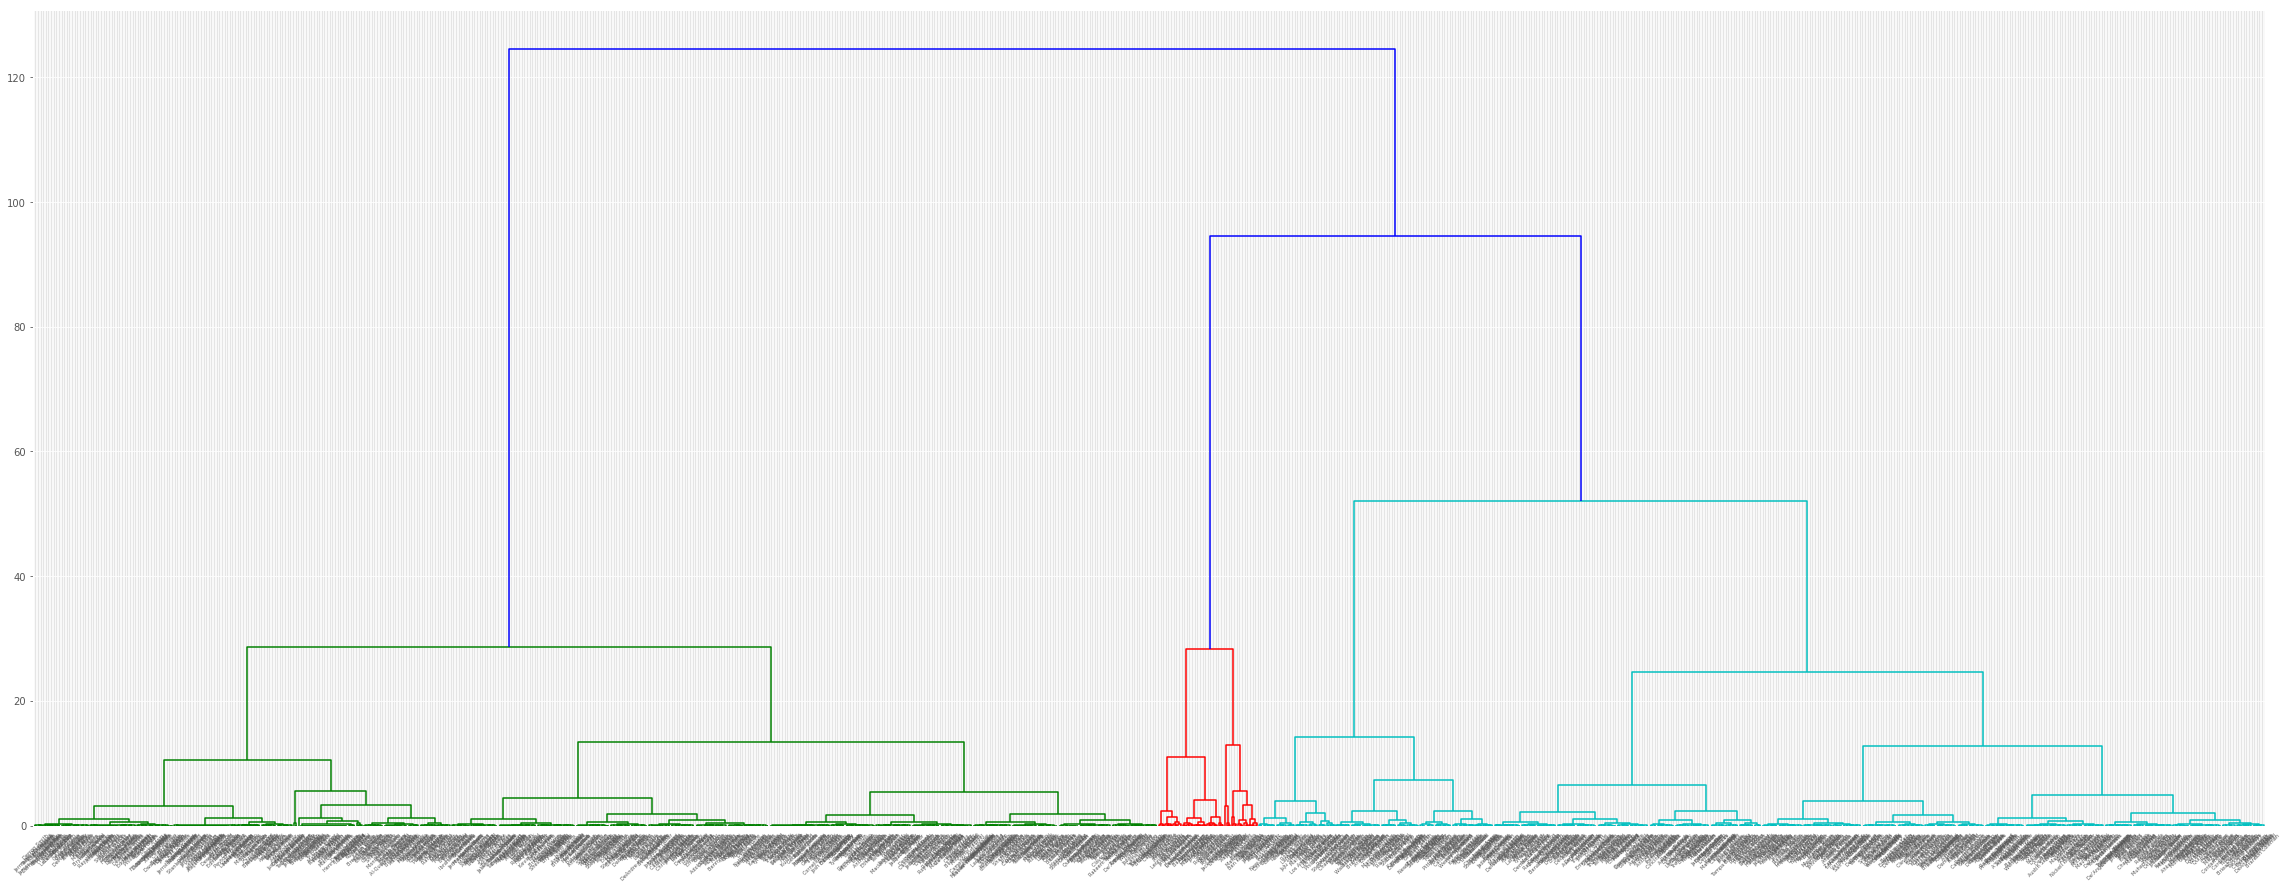

In [2]:
df = query_avg()

X = df['avg_points'].values.reshape(-1,1)
dist_vector = pdist(X, metric='euclidean')
linkage_mat = hr.linkage(dist_vector, method='ward')
plt.figure(figsize=(40,15));
dendrogram = hr.dendrogram(linkage_mat, labels=df['name'].values);
plt.xticks(rotation=45);
plt.savefig('../plots/dendrogram_ward_linkage_all')

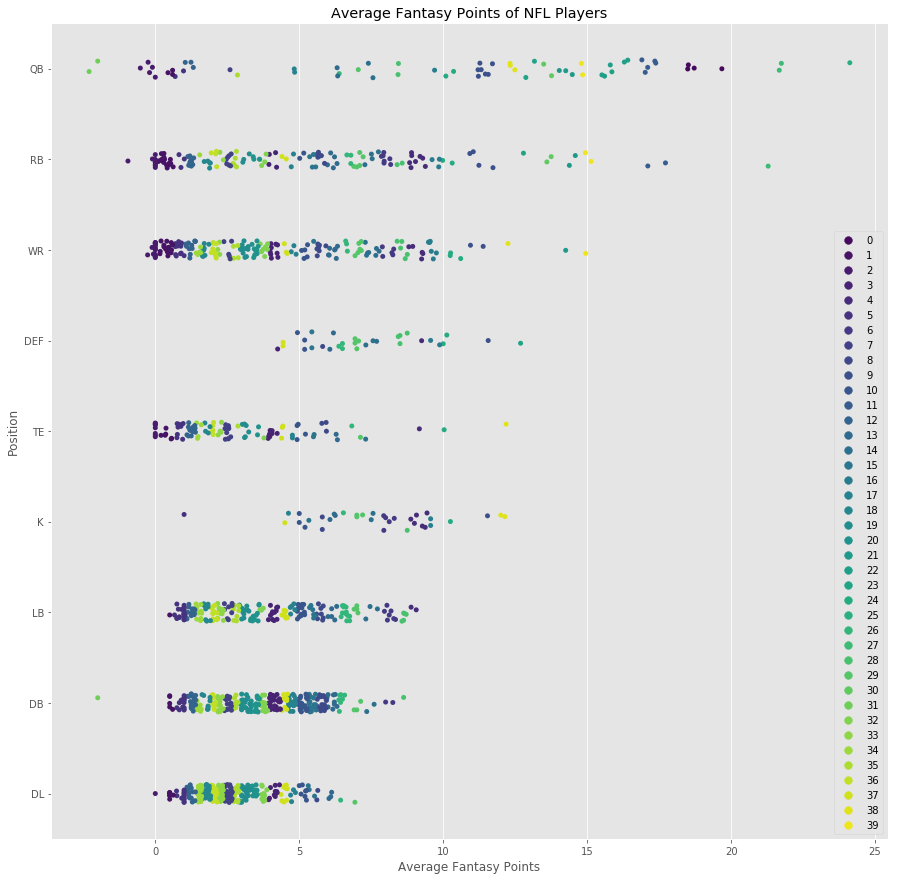

In [8]:
agg = AgglomerativeClustering(n_clusters=40, linkage='ward')
labels = agg.fit_predict(X)

plt.figure(figsize=(15,15));
plt.title('Average Fantasy Points of NFL Players');
sns.stripplot(x="avg_points", y="pos", data=df, hue=labels, palette='viridis', jitter=True);
plt.xlabel('Average Fantasy Points');
plt.ylabel('Position');

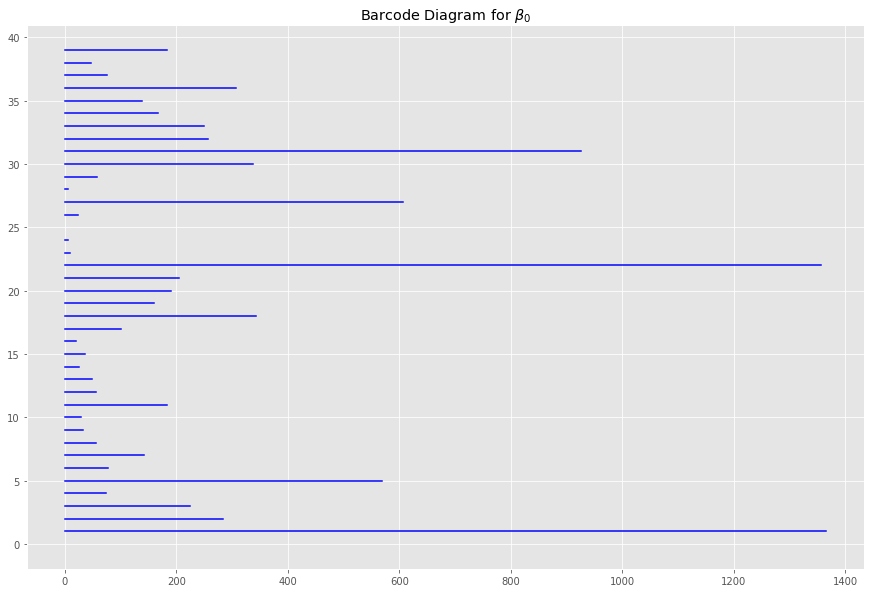

In [9]:
stats = df.iloc[:,4:].values

scaler = MinMaxScaler()
scaled_stats = scaler.fit_transform(stats)

cmapper = ClutchMapper()
cmapper.fit(scaled_stats, labels)

f = cmapper.build_filtration()

ph = d.homology_persistence(f)
dgms = d.init_diagrams(ph, f)

plt.figure(figsize=(15,10));
plt.title('Barcode Diagram for $\\beta_0$');
d.plot.plot_bars(dgms[0], show = True)

In [ ]:
all_complex = cmapper.build_complex(165)

fig = visualize_complex(wr_complex, 'All Complex')
iplot(fig, filename='all_complex')

In [ ]:
df['label'] = labels

col_list = ['name']

for col in df.columns[3:]:
    if df[col].max() > 0:
        col_list.append(col)